In [3]:
#name:Suhani Bade
#roll no:COBA34
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/data/churn_modeling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


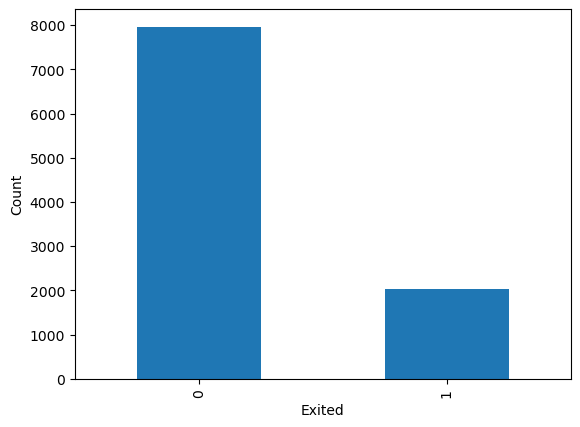

In [8]:
plt.xlabel('Exited')
plt.ylabel('Count')
df['Exited'].value_counts().plot.bar()
plt.show()

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
f = pd.concat([df,pd.get_dummies(df['Geography'],prefix= 'Geo')],axis=1)

In [13]:
df =pd. concat([df,pd. get_dummies(df['Gender'])] ,axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Female           10000 non-null  bool   
 15  Male             10000 non-null  bool   
dtypes: bool(2), float64(2), int64(9), object(3)
memory usage: 1

In [15]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], inplace=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,True,False


In [20]:
y = df[ 'Exited']. values
x = df.loc[:,df.columns != 'Exited'].values

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=20, test_size=0.2)

In [22]:
from sklearn.preprocessing import StandardScaler
# Initializing the StandardScaler
std_x = StandardScaler()
# Fitting the scaler to the training data and transforming it
x_train = std_x.fit_transform(x_train)
# Transforming the test data (without fitting again)
x_test = std_x.transform(x_test)

In [23]:
x_train.shape

(8000, 10)

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, Flatten 
from tensorflow.keras.models import Sequential, Model

In [33]:
model=Sequential()
model.add (Flatten (input_shape=(13,)))
model.add (Dense (100,activation='relu'))
model.add (Dense(1,activation='sigmoid'))

In [34]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='BinaryCrossentropy')

In [36]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))  # Make sure this matches the number of features in x_train
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
print(x_train.shape)  # This should output something like (num_samples, 10) if you have 10 features


(8000, 10)


In [40]:
# Define the model
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))  # Assuming 10 features in your data
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, batch_size=64, validation_split=0.1, epochs=100)


Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7192 - loss: 0.5731 - val_accuracy: 0.8150 - val_loss: 0.4424
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4222 - val_accuracy: 0.8300 - val_loss: 0.4128
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8324 - loss: 0.4004 - val_accuracy: 0.8462 - val_loss: 0.3822
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8487 - loss: 0.3710 - val_accuracy: 0.8587 - val_loss: 0.3667
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8401 - loss: 0.3770 - val_accuracy: 0.8600 - val_loss: 0.3509
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8556 - loss: 0.3520 - val_accuracy: 0.8600 - val_loss: 0.3475
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8589 - loss: 0.3427 - val_accuracy: 0.8625 - val_loss: 0.3410
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.3533 - val_accu

In [41]:
pred = model. predict (x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [42]:
y_pred = []
for val in pred:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [44]:
accuracy_score(y_test,y_pred)

0.854

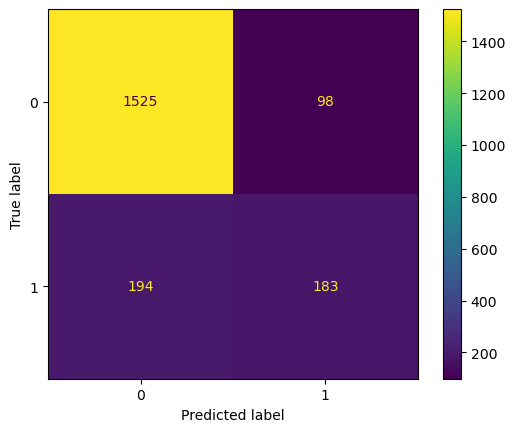

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [48]:
from sklearn.neural_network import MLPClassifier

# Create an instance of the MLPClassifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100), activation='logistic')

# Fit the classifier to the training data
nn_classifier.fit(x_train, y_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=100)

In [50]:
Y_pred2 = nn_classifier.predict (x_test)

In [53]:
# Generate predictions using the model
y_pred2 = model.predict(x_test)

# If you're doing binary classification, the predictions may need to be rounded or thresholded:
y_pred2 = (y_pred2 > 0.5).astype("int32")  # Assuming a binary classification model with sigmoid output

# Calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred2))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.854


In [57]:
score = model.evaluate(x_test, y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3449


In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, validation_split=0.1, epochs=100)


Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8734 - loss: 0.2916 - val_accuracy: 0.8537 - val_loss: 0.3694
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8745 - loss: 0.2909 - val_accuracy: 0.8562 - val_loss: 0.3679
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8800 - loss: 0.2839 - val_accuracy: 0.8575 - val_loss: 0.3664
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8794 - loss: 0.2871 - val_accuracy: 0.8487 - val_loss: 0.3735
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8797 - loss: 0.2877 - val_accuracy: 0.8438 - val_loss: 0.3748
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8856 - loss: 0.2789 - val_accuracy: 0.8525 - val_loss: 0.3739
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8875 - loss: 0.2762 - val_accuracy: 0.8475 - val_loss: 0.3787
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.2861 - val_accu

In [59]:
# Assuming your model is named 'model'
score = model.evaluate(x_test, y_test)

# Print the loss and accuracy
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3802
Test Loss: 0.41628170013427734
Test Accuracy: 0.8560000061988831


In [61]:
nn_classifier.score(x_test,y_test)

0.867

In [62]:
from sympy import Symbol, lambdify

In [63]:
x=Symbol('x')

The local minimum occurs at -0.4501865239392388


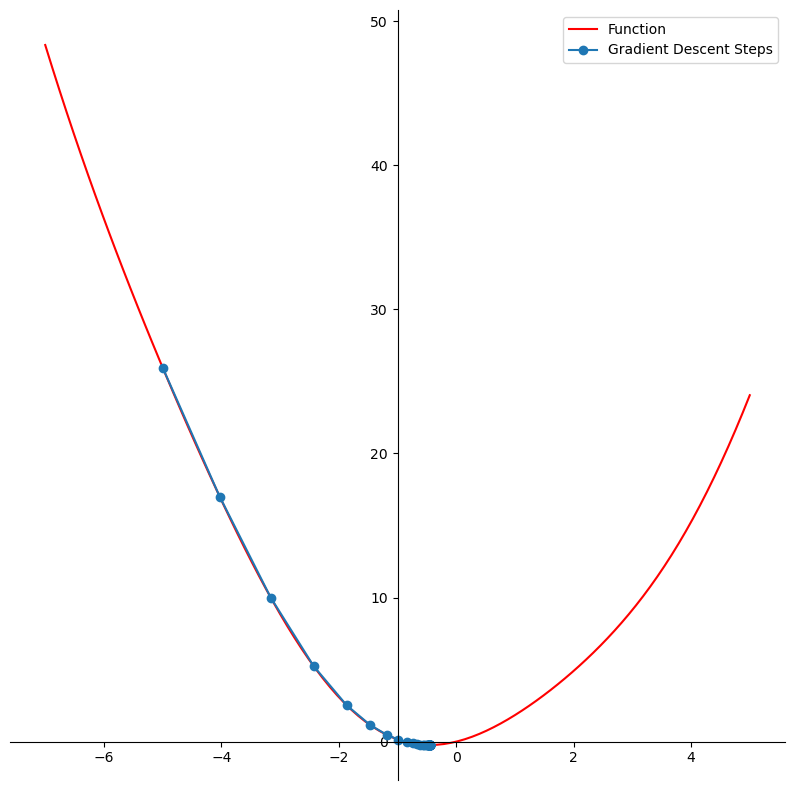

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify

# Define gradient descent function
def gradient_descent(function, start, learn_rate, n_iter=10000, tolerance=1e-06):
    x = symbols('x')  # Symbolic variable for differentiation
    gradient = lambdify(x, function.diff(x))  # Gradient of the function
    function = lambdify(x, function)  # Convert the function to a numerical function
    points = [start]  # List to store points
    step_size = 1
    iters = 0
    
    # Gradient Descent Loop
    while step_size > tolerance and iters < n_iter: 
        prev_x = start
        start = start - learn_rate * gradient(prev_x)  # Update the start position
        step_size = abs(start - prev_x)  # Calculate step size
        iters += 1
        points.append(start)  # Store the new point
    
    print("The local minimum occurs at", start)
    
    # Plotting
    x_ = np.linspace(-7, 5, 100)  # Generate x values for plotting
    y = function(x_)  # Calculate y values for the function
    
    # Setting up the plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    # Plot the function
    plt.plot(x_, y, 'r', label="Function")
    
    # Plot gradient descent points
    plt.plot(points, function(np.array(points)), '-o', label="Gradient Descent Steps")
    plt.legend()
    plt.show()

# Example usage
from sympy import sin

# Example function: f(x) = x^2 + sin(x)
x = symbols('x')
function = x**2 + sin(x)

# Call the gradient descent function
gradient_descent(function, start=-5, learn_rate=0.1)
